In [13]:
%cd /storage/lab/solar-energy-prediction

/storage/lab/solar-energy-prediction


In [14]:
import os
import pandas as pd
import numpy as np

csv_files = []
for root, dirs, files in os.walk("./data/weather"):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

print(csv_files)
print(len(csv_files))

['./data/weather/Aniche_hourly.csv', './data/weather/Beaupouyet_hourly.csv', './data/weather/Bugnicourt_hourly.csv', './data/weather/Cantin_hourly.csv', './data/weather/Cestas_hourly.csv', './data/weather/Colle-des-Mées_hourly.csv', './data/weather/Dechy_hourly.csv', './data/weather/Hamel_hourly.csv', './data/weather/Haulchin_hourly.csv', './data/weather/Jeumont_hourly.csv', './data/weather/Leforest_hourly.csv', './data/weather/Losse_hourly.csv', './data/weather/Lourches_hourly.csv', './data/weather/Marville_hourly.csv', './data/weather/Niergnies-Séranvillers-Forenville_hourly.csv', './data/weather/Oxelaëre_hourly.csv', './data/weather/Pont-sur-Sambre_hourly.csv', './data/weather/Prouvy-Trith-Saint-Léger_hourly.csv', './data/weather/Somain_hourly.csv', './data/weather/Thémis_hourly.csv', './data/weather/Toul-Rosières_hourly.csv']
21


In [32]:
weather_variables = ['datetime','timestamp','shortwave_radiation','temperature_2m', 'relative_humidity_2m','sunshine_duration','direct_normal_irradiance']
datasets = []
for file in csv_files:
    df = pd.read_csv(file)
    df = df[weather_variables]
    print(df['timestamp'].min(), df['timestamp'].max())
    datasets.append(df)


1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800
1577833200 1735768800


In [16]:
features = ['shortwave_radiation','temperature_2m', 'relative_humidity_2m','sunshine_duration','direct_normal_irradiance']

summed_weather_data = datasets[0]
for df in datasets[1:]:
    summed_weather_data[features] += df[features]/ len(datasets)

In [ ]:
from datetime import datetime
import zoneinfo

solar_data = pd.read_csv("data/energy/SOLAR.csv", index_col=0)
solar_data['datetime'] = solar_data['end'].apply(lambda x: datetime.fromtimestamp(x, tz=zoneinfo.ZoneInfo('Europe/Berlin')))
solar_data.rename(columns={'end': 'timestamp'}, inplace=True)
solar_data.head()
print(solar_data['end'].min(), solar_data['end'].max())


1577836800 1743717600


190621.39522765268
              end   timestamp
46052  1743703200  1735768800
46053  1743706800  1735768800
46054  1743710400  1735768800
46055  1743714000  1735768800
46056  1743717600  1735768800


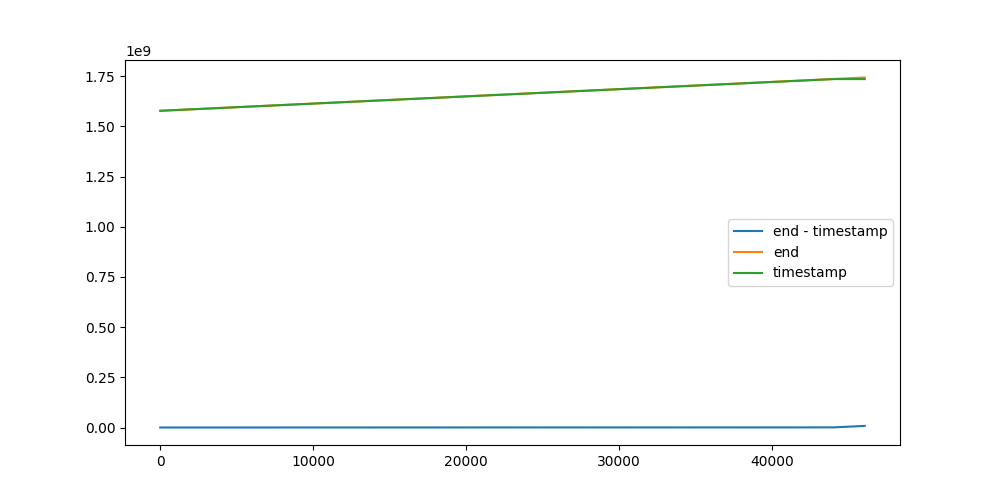

In [30]:
from matplotlib import pyplot as plt


fused_data = pd.merge_asof(
    solar_data.sort_values('datetime'),
    summed_weather_data.sort_values('datetime'),
    left_on='end',
    right_on='timestamp',
    direction='backward')

# fused_data = fused_data['start', 'end', 'values', 'datetime_x', 'datetime_y', 'timestamp',
#        'shortwave_radiation', 'temperature_2m', 'relative_humidity_2m',
#        'sunshine_duration', 'direct_normal_irradiance']


print(np.sum(fused_data['end'] -fused_data['timestamp'])/ len(fused_data))
print(fused_data[['end', 'timestamp']].tail())
x = np.arange(len(fused_data))
plt.figure(figsize=(10, 5))
plt.plot(x, fused_data['end'] - fused_data['timestamp'])
plt.plot(x, fused_data['end'])
plt.plot(x, fused_data['timestamp'])
plt.legend(['end - timestamp', 'end', 'timestamp'])
plt.show()

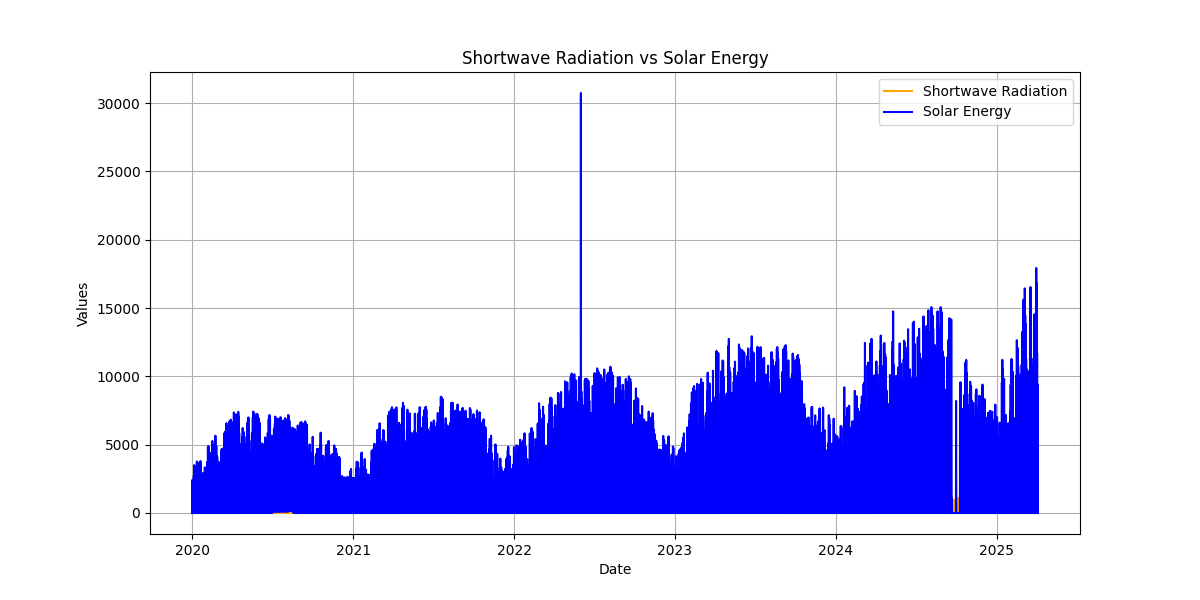

In [19]:
%matplotlib widget
import matplotlib.pyplot as plt

variables = features + ['values']

normalized_data = fused_data.copy()
normalized_data[variables] = normalized_data[variables] - normalized_data[variables].mean()
normalized_data[variables] = normalized_data[variables] / normalized_data[variables].std()

plt.figure(figsize=(12, 6))
plt.plot(fused_data['datetime_x'], fused_data['shortwave_radiation'], label='Shortwave Radiation', color='orange')
plt.plot(fused_data['datetime_x'], fused_data['values'], label='Solar Energy', color='blue')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Shortwave Radiation vs Solar Energy')
plt.legend()
plt.grid()
plt.show()

In [20]:
fused_data.columns

Index(['start', 'end', 'values', 'datetime_x', 'datetime_y', 'timestamp',
       'shortwave_radiation', 'temperature_2m', 'relative_humidity_2m',
       'sunshine_duration', 'direct_normal_irradiance'],
      dtype='object')

In [21]:
print(fused_data.head())

        start         end  values                datetime_x  \
0  1577833200  1577836800       0 2020-01-01 01:00:00+01:00   
1  1577836800  1577840400       0 2020-01-01 02:00:00+01:00   
2  1577840400  1577844000       0 2020-01-01 03:00:00+01:00   
3  1577844000  1577847600       0 2020-01-01 04:00:00+01:00   
4  1577847600  1577851200       0 2020-01-01 05:00:00+01:00   

            datetime_y   timestamp  shortwave_radiation  temperature_2m  \
0  2020-01-01 01:00:00  1577836800                  0.0        1.266667   
1  2020-01-01 02:00:00  1577840400                  0.0        0.895238   
2  2020-01-01 03:00:00  1577844000                  0.0        0.952381   
3  2020-01-01 04:00:00  1577847600                  0.0        0.571429   
4  2020-01-01 05:00:00  1577851200                  0.0        1.161905   

   relative_humidity_2m  sunshine_duration  direct_normal_irradiance  
0            174.190476                0.0                       0.0  
1            173.904762     

Starting XGBoost Solar Energy Prediction Pipeline
Preparing features...
Dataset shape after cleaning: (46009, 40)
Number of features: 33
Training set size: 36807
Test set size: 9202
Training XGBoost model...

MODEL PERFORMANCE
Training MAE: 279.3843
Testing MAE:  666.7990
Training RMSE: 549.6934
Testing RMSE:  1355.5487
Training R²: 0.9573
Testing R²:  0.8702


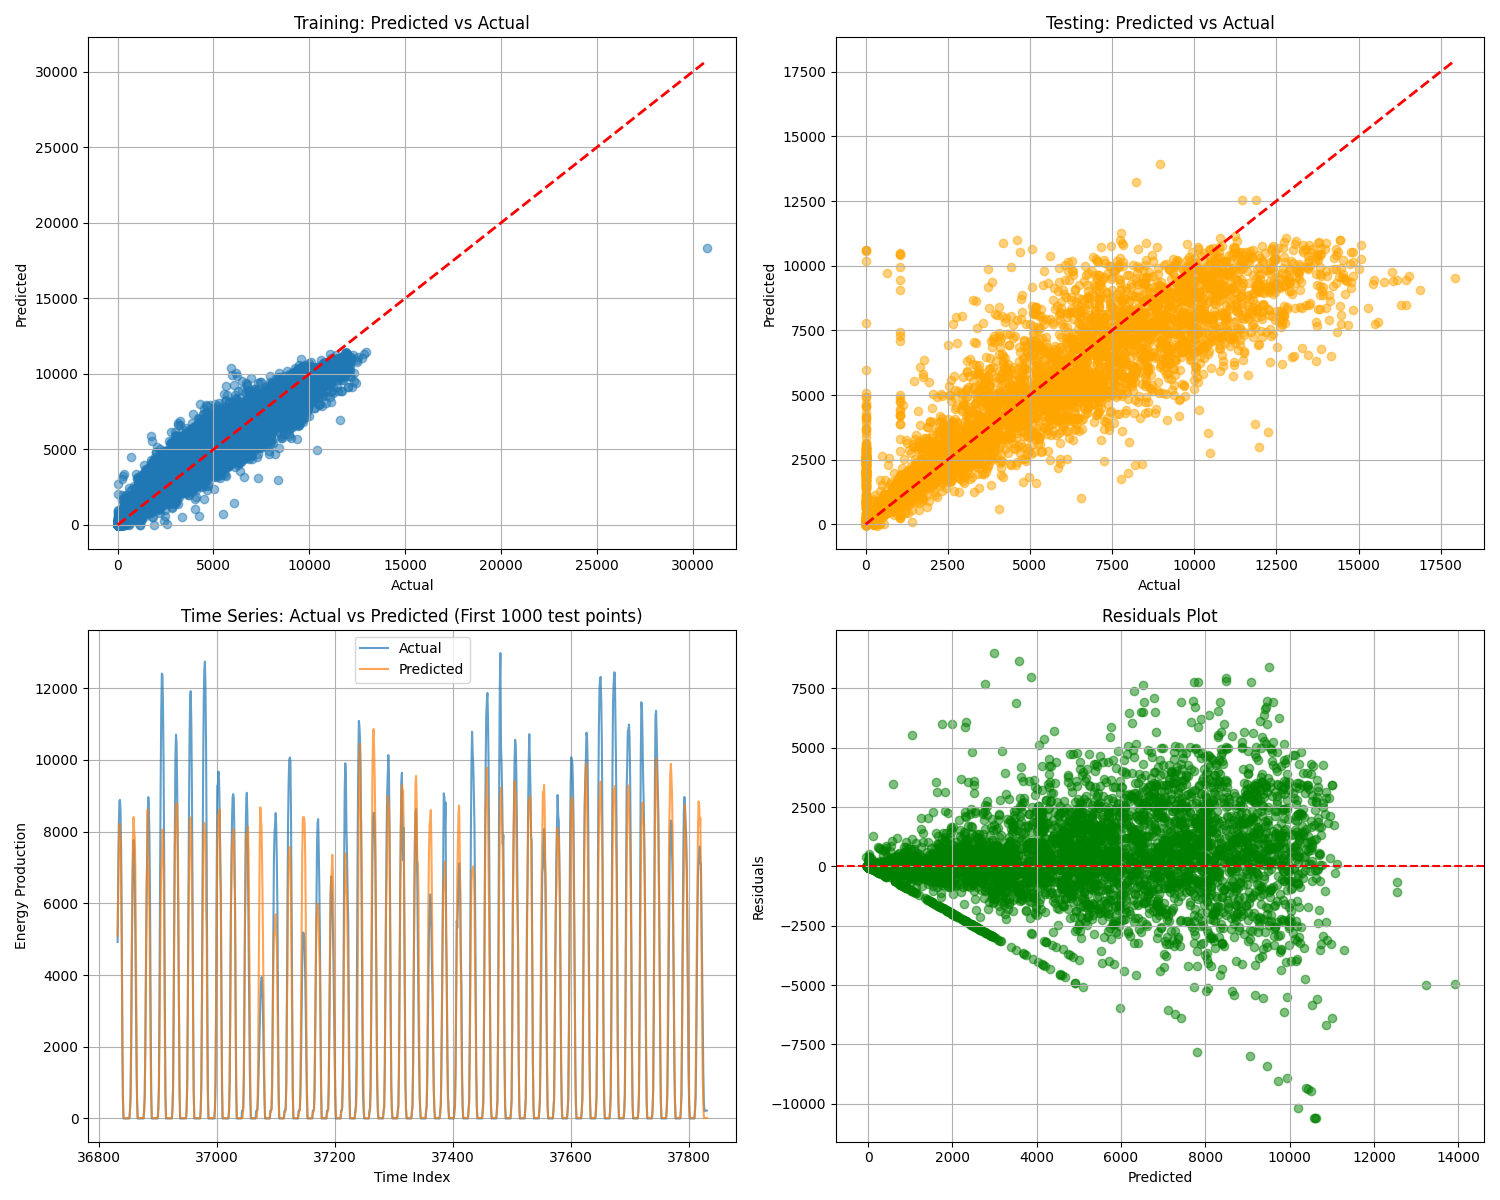

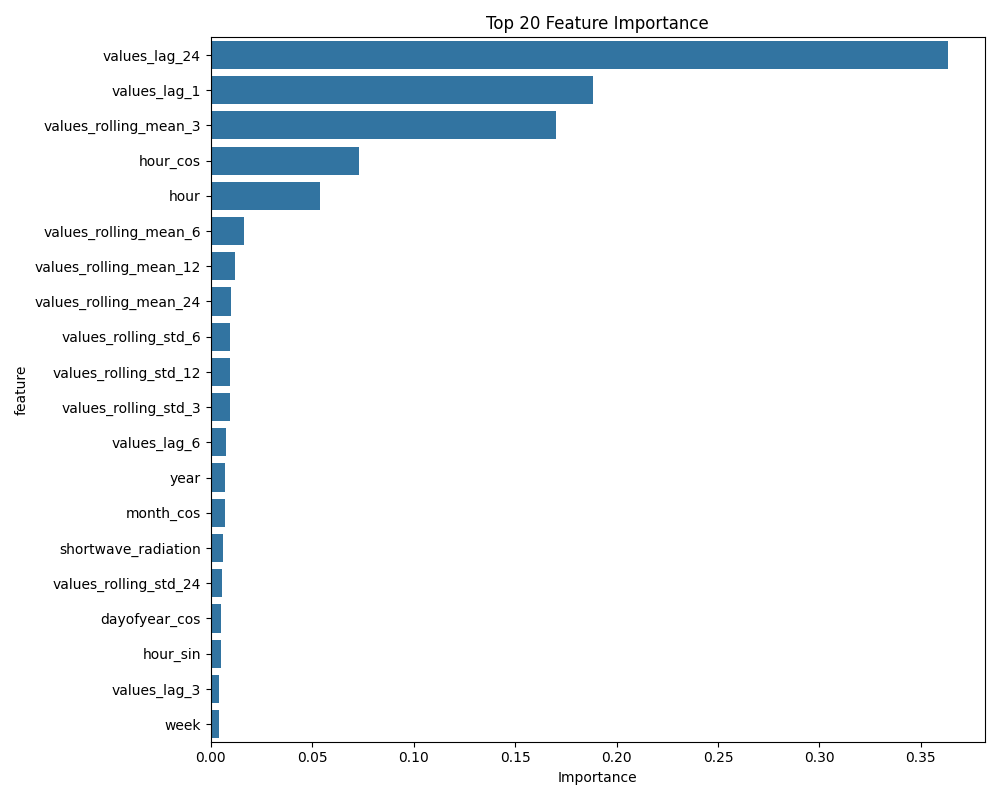

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...),
 ['shortwave_radiation',
  'temperature_2m',
  'relative_humidity_2m',
  'sunshine_duration',
  'direct_normal_irradiance',
  'hour',
  'day',
  'month',
  'year',
  'dayofweek',
  'dayofyear',
  'quarter',
  'week',
  'hour_sin',
  'hour_cos'

In [22]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def create_time_features(df):
    """
    Create time-based features from datetime column
    """
    df = df.copy()
    df['datetime_x'] = pd.to_datetime(df['datetime_x'])
    
    # Extract time features
    df['hour'] = df['datetime_x'].dt.hour
    df['day'] = df['datetime_x'].dt.day
    df['month'] = df['datetime_x'].dt.month
    df['year'] = df['datetime_x'].dt.year
    df['dayofweek'] = df['datetime_x'].dt.dayofweek
    df['dayofyear'] = df['datetime_x'].dt.dayofyear
    df['quarter'] = df['datetime_x'].dt.quarter
    df['week'] = df['datetime_x'].dt.isocalendar().week
    
    # Cyclical encoding for periodic features
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['dayofyear_sin'] = np.sin(2 * np.pi * df['dayofyear'] / 365)
    df['dayofyear_cos'] = np.cos(2 * np.pi * df['dayofyear'] / 365)
    
    return df

def create_lag_features(df, target_col='values', lags=[1, 2, 3, 6, 12, 24,-24]):
    """
    Create lagged features for time series
    """
    df = df.copy()
    df = df.sort_values('datetime_x')
    
    for lag in lags:
        df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)
    
    # Rolling window features
    for window in [3, 6, 12, 24]:
        df[f'{target_col}_rolling_mean_{window}'] = df[target_col].rolling(window=window).mean()
        df[f'{target_col}_rolling_std_{window}'] = df[target_col].rolling(window=window).std()
    
    return df

def prepare_features(df):
    """
    Prepare all features for modeling
    """
    df = create_time_features(df)
    df = create_lag_features(df)
    
    # Select weather features
    weather_features = [
        'shortwave_radiation', 'temperature_2m', 'relative_humidity_2m',
        'sunshine_duration', 'direct_normal_irradiance'
    ]
    
    # Select time features
    time_features = [
        'hour', 'day', 'month', 'year', 'dayofweek', 'dayofyear', 'quarter', 'week',
        'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'dayofyear_sin', 'dayofyear_cos'
    ]
    
    # Select lag features
    lag_features = [col for col in df.columns if 'lag_' in col or 'rolling_' in col]
    lag_features = [col for col in lag_features if col not in ['values_lag_-24']] 
    # Combine all features
    feature_columns = weather_features  + time_features + lag_features
    
    # df = df[feature_columns + ['values']].copy()

    return df, feature_columns

def train_xgboost_model(df):
    """
    Train XGBoost model for solar energy prediction
    """
    print("Preparing features...")
    df_prepared, feature_columns = prepare_features(df)
    
    # Remove rows with NaN values (due to lag features)
    df_clean = df_prepared.dropna()
    
    print(f"Dataset shape after cleaning: {df_clean.shape}")
    print(f"Number of features: {len(feature_columns)}")
    
    # Prepare features and target
    X = df_clean[feature_columns]
    y = df_clean['values_lag_-24'] 
    
    # Time series split (maintaining temporal order)
    # Use 80% for training, 20% for testing
    split_index = int(len(df_clean) * 0.8)
    
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]
    
    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    
    # Define XGBoost parameters
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'max_depth': 6,
        'learning_rate': 0.1,
        'n_estimators': 1000,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': 42,
        'early_stopping_rounds': 50,
        'verbose': False
    }
    
    # Train the model
    print("Training XGBoost model...")
    model = xgb.XGBRegressor(**params)
    
    # Fit with early stopping
    model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False
    )
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print("\n" + "="*50)
    print("MODEL PERFORMANCE")
    print("="*50)
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Testing MAE:  {test_mae:.4f}")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Testing RMSE:  {test_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Testing R²:  {test_r2:.4f}")
    
    return model, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred, feature_columns

def plot_results(y_train, y_test, y_train_pred, y_test_pred, df_clean):
    """
    Plot model results
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Training predictions vs actual
    axes[0,0].scatter(y_train, y_train_pred, alpha=0.5)
    axes[0,0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual')
    axes[0,0].set_ylabel('Predicted')
    axes[0,0].set_title('Training: Predicted vs Actual')
    axes[0,0].grid(True)
    
    # Test predictions vs actual
    axes[0,1].scatter(y_test, y_test_pred, alpha=0.5, color='orange')
    axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0,1].set_xlabel('Actual')
    axes[0,1].set_ylabel('Predicted')
    axes[0,1].set_title('Testing: Predicted vs Actual')
    axes[0,1].grid(True)
    
    # Time series plot - last 1000 points
    split_index = int(len(df_clean) * 0.8)
    time_idx = df_clean.index[split_index:split_index+1000]
    
    axes[1,0].plot(time_idx, y_test.iloc[:1000], label='Actual', alpha=0.7)
    axes[1,0].plot(time_idx, y_test_pred[:1000], label='Predicted', alpha=0.7)
    axes[1,0].set_xlabel('Time Index')
    axes[1,0].set_ylabel('Energy Production')
    axes[1,0].set_title('Time Series: Actual vs Predicted (First 1000 test points)')
    axes[1,0].legend()
    axes[1,0].grid(True)
    
    # Residuals plot
    residuals = y_test - y_test_pred
    axes[1,1].scatter(y_test_pred, residuals, alpha=0.5, color='green')
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Predicted')
    axes[1,1].set_ylabel('Residuals')
    axes[1,1].set_title('Residuals Plot')
    axes[1,1].grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, feature_columns, top_n=20):
    """
    Plot feature importance
    """
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(top_n), x='importance', y='feature')
    plt.title(f'Top {top_n} Feature Importance')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    return feature_importance

def hyperparameter_tuning(X_train, y_train):
    """
    Perform hyperparameter tuning using TimeSeriesSplit
    """
    print("Performing hyperparameter tuning...")
    
    # Define parameter grid
    param_grid = {
        'max_depth': [4, 6, 8],
        'learning_rate': [0.05, 0.1, 0.15],
        'n_estimators': [500, 1000],
        'subsample': [0.8, 0.9],
        'colsample_bytree': [0.8, 0.9]
    }
    
    # Use TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=3)
    
    # Grid search
    xgb_model = xgb.XGBRegressor(random_state=42, early_stopping_rounds=50, verbose=False)
    grid_search = GridSearchCV(
        xgb_model, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {-grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

# Main execution
def main(df):
    """
    Main function to run the complete pipeline
    """
    print("Starting XGBoost Solar Energy Prediction Pipeline")
    print("="*60)
    
    # Train the model
    model, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred, feature_columns = train_xgboost_model(df)
    
    # Plot results
    df_prepared, _ = prepare_features(df)
    df_clean = df_prepared.dropna()
    plot_results(y_train, y_test, y_train_pred, y_test_pred, df_clean)
    
    # Show feature importance
    feature_importance = plot_feature_importance(model, feature_columns)
    
    # Optional: Hyperparameter tuning (uncomment if needed)
    # best_model = hyperparameter_tuning(X_train, y_train)
    
    return model, feature_columns, feature_importance

# Example usage:
# Assuming your dataframe is called 'df'
# model, feature_columns, feature_importance = main(df)

# To make predictions on new data:
def predict_new_data(model, new_df, feature_columns):
    """
    Make predictions on new data
    """
    new_df_prepared, _ = prepare_features(new_df)
    new_X = new_df_prepared[feature_columns].fillna(method='ffill')
    predictions = model.predict(new_X)
    return predictions

main(fused_data)